# Initialize and Setup

In [1]:
import os
import time

import numpy as np
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve

import ml_util as utl

save_directory = "figures/SVM"
model_name = "SVM"

folders = ["figures/SVM/Grid_Search_Results",
           "figures/SVM/Complexity_Analysis",
           "figures/SVM/Learning_Curves",
           "figures/SVM/Confusion_Matrix",
           "figures/SVM/Metrics"]

directories = {
    "Save Directory": "figures/SVM",
    "Initial Complexity Analysis": "figures/SVM/Initial Complexity Analysis",
    "Grid Search Results": "figures/SVM/Grid Search Results",
    "Learning Curves": "figures/SVM/Learning Curves",
    "Final Complexity Analysis": "figures/SVM/Final Complexity Analysis"
}

Random_Number = 42
TESTING =  False
cv = 5
n_jobs = -1
np.random.seed(42)
get_ipython().system('pip install pyarrow')

<Figure size 1600x1200 with 0 Axes>

In [2]:
gathered_data = utl.setup(["MNIST"])
gathered_data_fashion = utl.setup(["Fashion-MNIST"])
train_X, train_y, valid_X, valid_y, test_X, test_y = utl.split_data(gathered_data["MNIST"]["X"],
                                                                    gathered_data["MNIST"]["y"], normalize=True)
fashion_train_X, fashion_train_y, fashion_valid_X, fashion_valid_y, fashion_test_X, fashion_test_y = utl.split_data(
    gathered_data_fashion["Fashion-MNIST"]["X"],
    gathered_data_fashion["Fashion-MNIST"]["y"],
    normalize=True)

dataset folder already exists.
MNIST dataset found:
	Loading MNIST.feather
	Finished loading MNIST dataset
dataset folder already exists.
Fashion-MNIST dataset found:
	Loading Fashion-MNIST.feather
	Finished loading Fashion-MNIST dataset


In [3]:
CHECK_FOLDER = os.path.isdir(save_directory)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(save_directory)
    print("created folder : ", save_directory)
else:
    print(save_directory, "folder already exists.")

for f in folders:
    if not os.path.isdir(f):
        os.makedirs(f)
        print("created folder : ", f)
    else:
        print(f, "folder already exists.")

figures/SVM folder already exists.
figures/SVM/Grid_Search_Results folder already exists.
figures/SVM/Complexity_Analysis folder already exists.
figures/SVM/Learning_Curves folder already exists.
figures/SVM/Confusion_Matrix folder already exists.
figures/SVM/Metrics folder already exists.


In [4]:
# Kernel ~ 'rbf'
#          'sigmoid'

# degree ~ The degree of the polynomial (only used with poly kernel)


val = 3000
pred_val = 3000
train_sizes = np.linspace(0.05, 1.0, 20)

In [7]:
a = 10. ** np.arange(-4, 4, 1)
if TESTING:
    e = np.sort(a)
else:
    e = np.sort(np.hstack((a, a * 3, a * 5, a * 7)))

In [ ]:
# Vary the kernel { "rbf", "sigmoid"}

# Vary the training sizes

In [29]:
e

array([1.e-04, 3.e-04, 5.e-04, 7.e-04, 1.e-03, 3.e-03, 5.e-03, 7.e-03,
       1.e-02, 3.e-02, 5.e-02, 7.e-02, 1.e-01, 3.e-01, 5.e-01, 7.e-01,
       1.e+00, 3.e+00, 5.e+00, 7.e+00, 1.e+01, 3.e+01, 5.e+01, 7.e+01,
       1.e+02, 3.e+02, 5.e+02, 7.e+02, 1.e+03, 3.e+03, 5.e+03, 7.e+03])

In [31]:
val

3000

# Initial Model Complexity: RBF

In [8]:
parameter_range = e
param_name = "C"
param_name_plot = "C"
kernel_name = "Linear"

In [9]:
mnist_train_results_rbf = None
mnist_test_results_rbf = None
fashion_train_results_rbf = None
fashion_test_results_rbf = None

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of 160 | elapsed:  1.0min remaining:  4.7min
[Parallel(n_jobs=-1)]: Done  62 out of 160 | elapsed:  2.0min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done  95 out of 160 | elapsed:  2.9min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done 128 out of 160 | elapsed:  3.5min remaining:   52.7s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  4.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of 160 | elapsed:  1.0min remaining:  4.7min
[Parallel(n_jobs=-1)]: Done  62 out of 160 | elapsed:  2.1min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done  95 out of 160 | elapsed:  2.9min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done 128 out of 160 | elapsed:  3.4min remaining:   51.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  3.9min finished


Run Time: 496.761109828949s


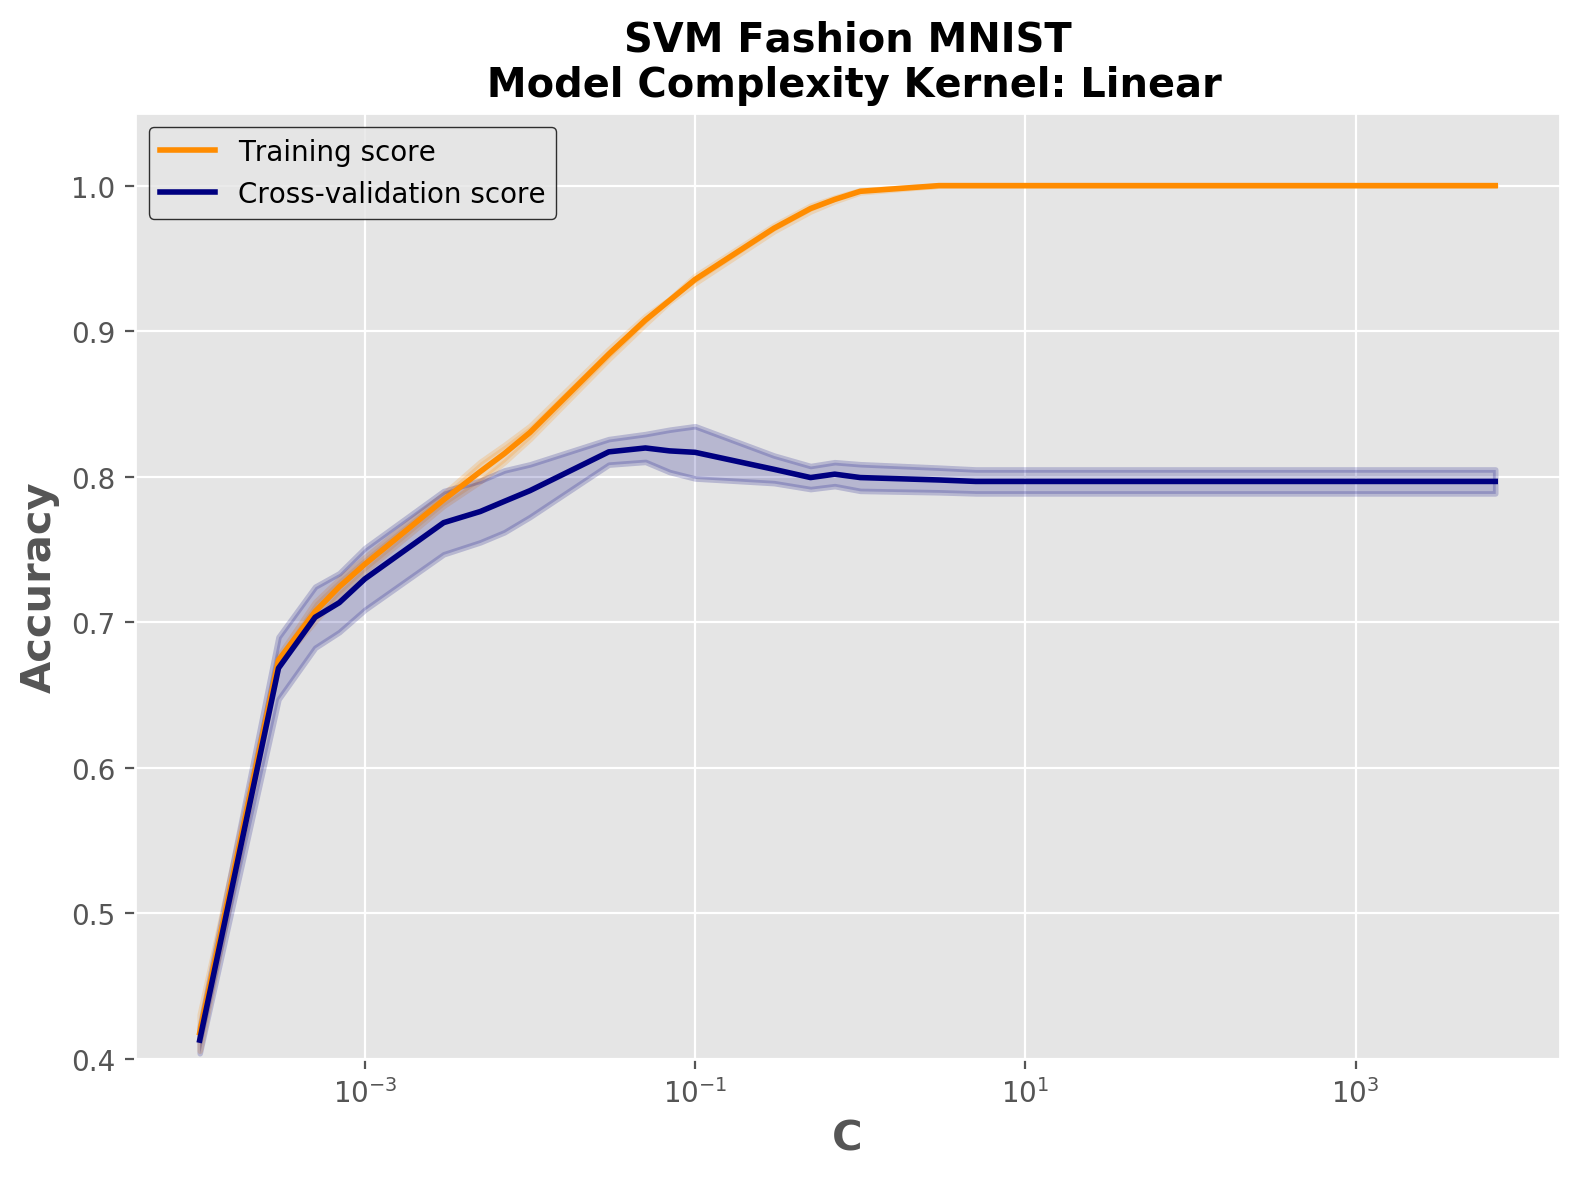

In [10]:
start_time = time.time()
for i in range(2):
    if i == 0:
        temp_train_X = train_X.iloc[:val, :]
        temp_train_y = train_y.iloc[:val]
        f_name = f"{model_name}_{param_name}_MNIST_{kernel_name}"
        algorithm_name = f"{model_name} {param_name} MNIST\n Model Complexity {kernel_name}"
        plot_title = f"{model_name} MNIST\n Model Complexity Kernel: {kernel_name}"
        ex = "MNIST_C_INIT_LINEAR"
    else:
        temp_train_X = fashion_train_X.iloc[:val, :]
        temp_train_y = fashion_train_y.iloc[:val]
        f_name = f"{model_name}_{param_name}_Fashion_MNIST_{kernel_name}"
        algorithm_name = f"{model_name} {param_name} Fashion MNIST\n Model Complexity {kernel_name}"
        plot_title = f"{model_name} Fashion MNIST\n Model Complexity Kernel: {kernel_name}"
        ex = "Fashion_MNIST_C_INIT_LInear"
    
    temp_train, temp_test = utl.get_model_complexity(classifier=SVC(kernel="linear", cache_size=400),
                                                     train_X=temp_train_X, train_y=temp_train_y, parameter_name=param_name,
                                                     save_dir=save_directory, algorithm_name=algorithm_name, 
                                                     parameter_range=parameter_range, cv=5,
                                                     n_jobs=n_jobs, verbose=5, backend='loky',
                                                     param_name_for_plot=param_name_plot,fileName=ex,
                                                     f_name=f_name, plot_title=plot_title, is_SVM=True,
                                                     extra_name=ex, folder="SVM", use_log_x=True)
    if i == 0:
        mnist_train_results_rbf = temp_train
        mnist_test_results_rbf = temp_test
    else:
        fashion_train_results_rbf = temp_train
        fashion_test_results_rbf = temp_test

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Run Time: {elapsed_time}s")


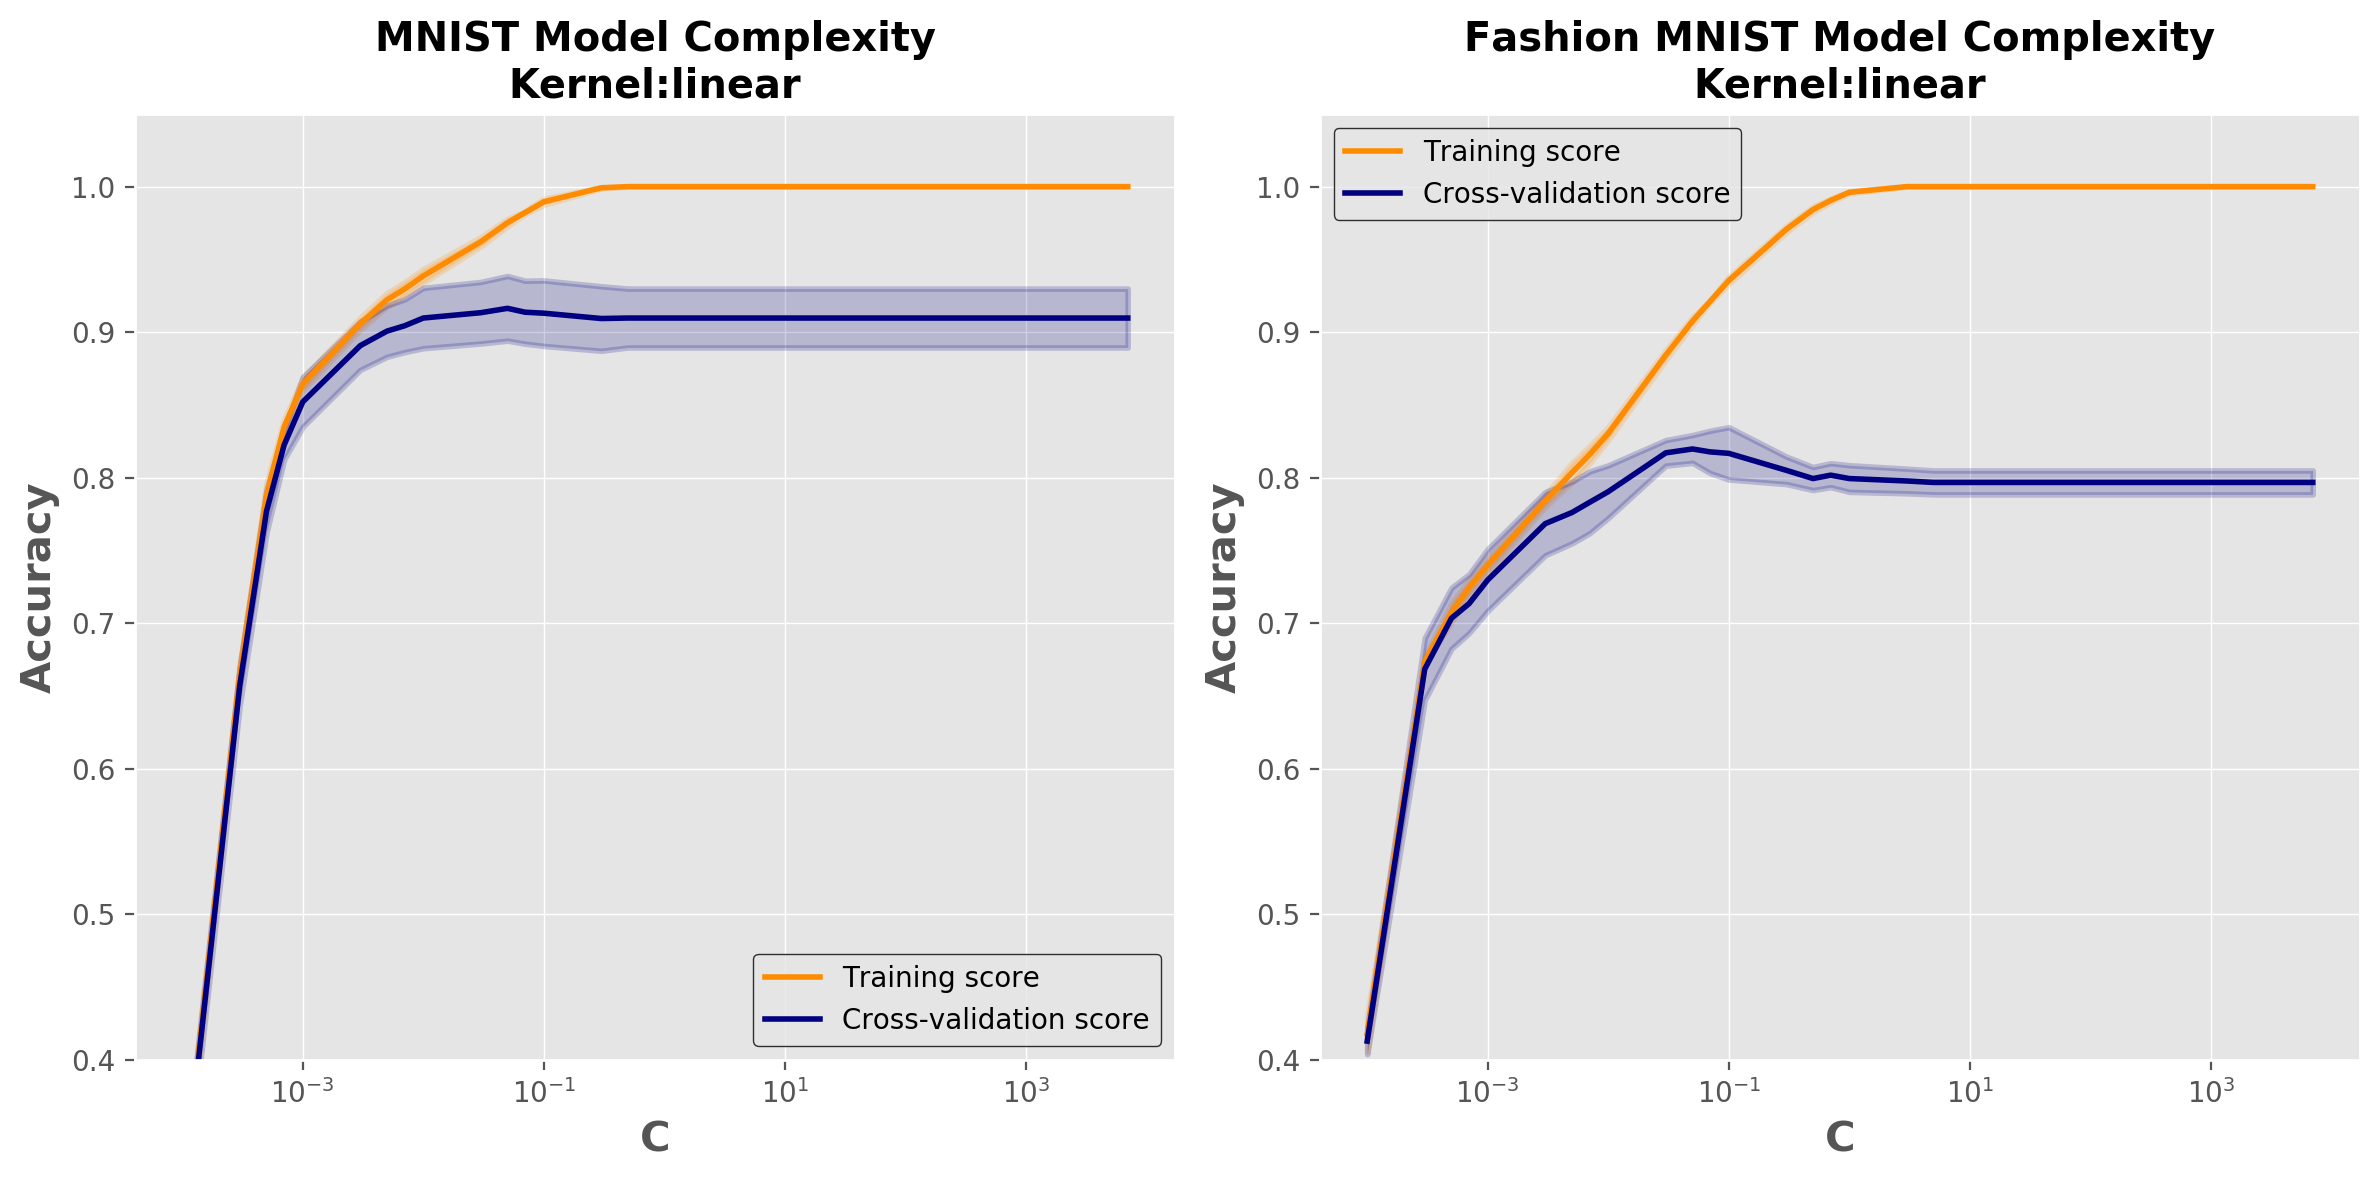

In [16]:
utl.plot_combined_complexity("SVM", "C", is_NN=False, is_SVM=True, parameter_range=parameter_range,
                             orientation='Horizontal', plt_width=12, plt_height=6,
                             mnist_train_complex=mnist_train_results_rbf, mnist_test_complex=mnist_test_results_rbf,
                             fashion_train_complex=fashion_train_results_rbf, use_log_x=True, use_saved=False,
                             fashion_test_complex=fashion_test_results_rbf, folder="SVM", only_one=True, which_one='linear', extra_name="Combined_Complexity_C_LINEAR")

# Initial Confusion Matrix: RBF

In [ ]:
clf = SVC(kernel='rbf', cache_size=400)
clf.fit(train_X.iloc[:val, :], train_y.iloc[:val])

clf2 = SVC(kernel='rbf', cache_size=400)
clf2.fit(fashion_train_X.iloc[:val, :], fashion_train_y.iloc[:val])

In [ ]:
utl.plot_combined_confusion_matrix(clf, valid_X, valid_y, clf2, fashion_valid_X, fashion_valid_y,
                                   directory=save_directory, fmt=None, plot_width=12, plot_height=6, extra_name="RBF",
                                   folder="SVM")

# Initial Learning Curve: RBF

In [ ]:
initial_svm_rbf = SVC(kernel='rbf')

In [ ]:
start_time = time.time()
results = []
for i in range(2):
    print(f"Working on learning curve: {i}")
    res = {"plt": None,
           "svm_results": None,
           "cv_results": None}
    if i == 0:
        temp_train_X = train_X.iloc[:val, :]
        temp_train_y = train_y.iloc[:val]
        title = f"{model_name} MNIST Learning Curve"
        f_name = f"{model_name}_MNIST"
    else:
        temp_train_X = fashion_train_X.iloc[:val, :]
        temp_train_y = fashion_train_y.iloc[:val]
        title = f"{model_name} Fashion MNIST Learning Curve"
        f_name = f"{model_name}_Fashion_MNIST"
    
    res['svm_results'], res['cv_results'] = utl.plot_learning_curve(estimator=initial_svm_rbf, title=title,
                                                                    train_X=temp_train_X, train_y=temp_train_y, cv=cv,
                                                                    f_name=f_name, train_sizes=train_sizes,
                                                                    folder="SVM",
                                                                    save_individual=True, TESTING=True, backend='loky',
                                                                    n_jobs=n_jobs,
                                                                    extra_name="RBF")
    results.append(res)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Run Time: {elapsed_time}s")

# Initial Metrics: RBF

In [ ]:
clf = SVC(kernel='rbf', cache_size=400) # need to change to reflect learning curve results
p, r, f1 = utl.plot_precision_recall(clf, train_X.iloc[:2000, :], train_y.iloc[:2000], valid_X.iloc[:2000, :],
                                 valid_y.iloc[:2000], folder="SVM", dataset_name="MNIST",
                                 plot_title="Support Vector Machine")

# Initial Model Complexity: Linear

In [ ]:
parameter_range = np.sort(e.flatten())
param_name = "C"
param_name_plot = "C"
kernel_name = "Linear"

In [ ]:
mnist_train_results_lin = None
mnist_test_results_lin = None
fashion_train_results_lin = None
fashion_test_results_lin = None

In [ ]:
start_time = time.time()
for i in range(2):
    if i == 0:
        temp_train_X = train_X.iloc[:val, :]
        temp_train_y = train_y.iloc[:val]
        f_name = f"{model_name}_{param_name}_MNIST_{kernel_name}"
        algorithm_name = f"{model_name} {param_name} MNIST\n Model Complexity {kernel_name}"
        plot_title = f"{model_name} MNIST\n Model Complexity Kernel: {kernel_name}"
    else:
        temp_train_X = fashion_train_X.iloc[:val, :]
        temp_train_y = fashion_train_y.iloc[:val]
        f_name = f"{model_name}_{param_name}_Fashion_MNIST_{kernel_name}"
        algorithm_name = f"{model_name} {param_name} Fashion MNIST\n Model Complexity {kernel_name}"
        plot_title = f"{model_name} Fashion MNIST\n Model Complexity Kernel: {kernel_name}"
    
    temp_train, temp_test = utl.get_model_complexity(classifier=SVC(kernel=kernel_name.lower(), cache_size=400),
                                                     train_X=temp_train_X,
                                                     train_y=temp_train_y, parameter_name=param_name,
                                                     save_dir=save_directory,
                                                     algorithm_name=algorithm_name, parameter_range=parameter_range,
                                                     cv=5, use_log_x=True,
                                                     n_jobs=n_jobs, verbose=5, backend='loky',
                                                     param_name_for_plot=param_name_plot,
                                                     f_name=f_name, plot_title=plot_title, is_SVM=True,
                                                     extra_name="Linear", folder="SVM")
    if i == 0:
        mnist_train_results_lin = temp_train
        mnist_test_results_lin = temp_test
    else:
        fashion_train_results_lin = temp_train
        fashion_test_results_lin = temp_test

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Run Time: {elapsed_time}s")

In [ ]:
utl.plot_combined_complexity("SVM", "C", is_NN=False, is_SVM=True, parameter_range=parameter_range,
                             orientation='Horizontal', plt_width=12, plt_height=6, extra_name="Linear",
                             mnist_train_complex=mnist_train_results_lin, mnist_test_complex=mnist_test_results_lin,
                             fashion_train_complex=fashion_train_results_lin, use_log_x=True, use_saved=False,
                             fashion_test_complex=fashion_test_results_lin, folder="SVM", only_one=True, which_one='linear',
                             ylim=(0.1, 1.05))

# Initial Confusion Matrix: Linear

In [ ]:
clf = SVC(kernel='linear', cache_size=400)
clf.fit(train_X.iloc[:val, :], train_y.iloc[:val])

clf2 = SVC(kernel='linear', cache_size=400)
clf2.fit(fashion_train_X.iloc[:val, :], fashion_train_y.iloc[:val])

In [ ]:
utl.plot_combined_confusion_matrix(clf, valid_X, valid_y, clf2, fashion_valid_X, fashion_valid_y,
                                   directory=save_directory, fmt=None, plot_width=12, plot_height=6,
                                   extra_name="Linear", folder="SVM")

# Initial Learning Curve: Linear

In [ ]:
initial_svm_linear = SVC(kernel='linear')

In [ ]:
start_time = time.time()
results = []
for i in range(2):
    print(f"Working on learning curve: {i}")
    res = {"plt": None,
           "svm_results": None,
           "cv_results": None}
    if i == 0:
        temp_train_X = train_X.iloc[:val, :]
        temp_train_y = train_y.iloc[:val]
        title = f"{model_name} MNIST Learning Curve"
        f_name = f"{model_name}_MNIST"
    else:
        temp_train_X = fashion_train_X.iloc[:val, :]
        temp_train_y = fashion_train_y.iloc[:val]
        title = f"{model_name} Fashion MNIST Learning Curve"
        f_name = f"{model_name}_Fashion_MNIST"
    
    res['svm_results'], res['cv_results'] = utl.plot_learning_curve(estimator=initial_svm_linear, title=title,
                                                                    train_X=temp_train_X, train_y=temp_train_y, cv=cv,
                                                                    f_name=f_name, train_sizes=train_sizes,
                                                                    folder="SVM",
                                                                    save_individual=True, TESTING=True, backend='loky',
                                                                    n_jobs=n_jobs,
                                                                    extra_name="Linear")
    results.append(res)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Run Time: {elapsed_time}s")

In [ ]:
print("hey")

# Initial Metrics: Linear

In [ ]:
clf = SVC(kernel='linear', cache_size=400) # need to change to reflect learning curve results
p, r, f1 = utl.plot_precision_recall(clf, train_X.iloc[:val, :], train_y.iloc[:val], valid_X.iloc[:val, :],
                                 valid_y.iloc[:val], folder="SVM", dataset_name="MNIST",
                                 plot_title="Support Vector Machine")

# Gridsearch: RBF

In [ ]:
rbf_a = 10. ** np.arange(-7, -3, 1)

if TESTING:
    gamma_rbf = np.sort(rbf_a)

else:
    gamma_rbf = np.sort(np.hstack((rbf_a, rbf_a * 3, rbf_a * 5, rbf_a * 7)))


params_rbf = {'kernel': ['rbf'], 'C': 10. ** np.arange(-2, 5, 1), 'gamma': gamma_rbf}

params_lin = {'kernel': ['linear'], 'C': 10. ** np.arange(-4, 1, 1), 'gamma': ['scale'], 'class_weight': ['balanced']}
parameters_rbf = ParameterGrid(params_rbf)
parameters_lin = ParameterGrid(params_lin)

In [ ]:
best_rbf_mnist_estimator = None
best_rbf_fashion_estimator = None
res = []
start_time = time.time()
for i in range(2):
    if i == 0:
        temp_train_X = train_X.iloc[:val, :]
        temp_train_y = train_y.iloc[:val]
        algorithm_name = f"{model_name}_MNIST"
    else:
        temp_train_X = fashion_train_X.iloc[:val, :]
        temp_train_y = fashion_train_y.iloc[:val]
        algorithm_name = f"{model_name}_Fashion_MNIST"
    
    grid_results_mnist_rbf, optimized_svm_mnist_rbf = utl.run_grid_search(
        classifier=SVC(cache_size=400, random_state=Random_Number, kernel="rbf"), parameters=params_rbf,
        train_X=temp_train_X, train_y=temp_train_y, cv=cv,
        n_jobs=n_jobs, verbose=5, return_train_score=True, refit=True,
        save_dir=save_directory, algorithm_name=algorithm_name,
        backend='loky', extra_f_name="RBF", folder="SVM")
    if i == 0:
        best_rbf_mnist_estimator = optimized_svm_mnist_rbf.best_estimator_
    else:
        best_rbf_fashion_estimator = optimized_svm_mnist_rbf.best_estimator_
    
    print(f"\nBest Parameters:\n\t{optimized_svm_mnist_rbf.best_params_}")
    res.append((grid_results_mnist_rbf, optimized_svm_mnist_rbf))
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Run Time: {elapsed_time}s")

# Gridsearch: Linear

In [ ]:
best_lin_mnist_estimator = None
best_lin_fashion_estimator = None
res2 = []
start_time = time.time()
for i in range(2):
    if i == 0:
        temp_train_X = train_X.iloc[:val, :]
        temp_train_y = train_y.iloc[:val]
        algorithm_name = f"{model_name}_MNIST"
    else:
        temp_train_X = fashion_train_X.iloc[:val, :]
        temp_train_y = fashion_train_y.iloc[:val]
        algorithm_name = f"{model_name}_Fashion_MNIST"
    
    grid_results_mnist_lin, optimized_svm_mnist_lin = utl.run_grid_search(
        classifier=SVC(cache_size=400, random_state=Random_Number), parameters=params_lin,
        train_X=temp_train_X, train_y=temp_train_y, cv=cv,
        n_jobs=n_jobs, verbose=5, return_train_score=True, refit=True,
        save_dir=save_directory, algorithm_name=algorithm_name,
        backend='loky', extra_f_name="Linear", folder="SVM")
    if i == 0:
        best_lin_mnist_estimator = optimized_svm_mnist_lin.best_estimator_
    else:
        best_lin_fashion_estimator = optimized_svm_mnist_lin.best_estimator_
    
    print(f"\nBest Parameters:\n\t{optimized_svm_mnist_lin.best_params_}")
    print(f"\nBest Parameters:\n\t{optimized_svm_mnist_lin.best_score_}")
    res2.append((grid_results_mnist_lin, optimized_svm_mnist_lin))
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Run Time: {elapsed_time}s")

# Final Learning Curve: RBF

In [ ]:
start_time = time.time()
results = []
for i in range(2):
    print(f"Working on learning curve: {i}")
    res = {"plt": None,
           "svm_results": None,
           "cv_results": None}
    if i == 0:
        temp_train_X = train_X.iloc[:val, :]
        temp_train_y = train_y.iloc[:val]
        title = f"{model_name} MNIST Learning Curve"
        f_name = f"{model_name}_MNIST"
        optimized_svm = best_rbf_mnist_estimator
    else:
        temp_train_X = fashion_train_X.iloc[:val, :]
        temp_train_y = fashion_train_y.iloc[:val]
        title = f"{model_name} Fashion MNIST Learning Curve"
        f_name = f"{model_name}_Fashion_MNIST"
        optimized_svm = best_rbf_fashion_estimator
    
    res['svm_results'], res['cv_results'] = utl.plot_learning_curve(estimator=optimized_svm, title=title,
                                                                    train_X=temp_train_X, train_y=temp_train_y, cv=cv,
                                                                    f_name=f_name, train_sizes=train_sizes,
                                                                    n_jobs=n_jobs, folder="SVM",
                                                                    save_individual=True, TESTING=True, backend='loky',
                                                                    extra_name="RBF_Final")
    results.append(res)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Run Time: {elapsed_time}s")

# Final Learning Curve: Linear

In [ ]:
start_time = time.time()
results = []
for i in range(2):
    print(f"Working on learning curve: {i}")
    res = {"plt": None,
           "svm_results": None,
           "cv_results": None}
    if i == 0:
        temp_train_X = train_X.iloc[:val, :]
        temp_train_y = train_y.iloc[:val]
        title=f"{model_name} MNIST Learning Curve"
        f_name= f"{model_name}_MNIST"
        optimized_svm_linear = best_lin_mnist_estimator
    else:
        temp_train_X = fashion_train_X.iloc[:val, :]
        temp_train_y = fashion_train_y.iloc[:val]
        title=f"{model_name} Fashion MNIST Learning Curve"
        f_name= f"{model_name}_Fashion_MNIST"
        optimized_svm_linear = best_lin_fashion_estimator
    
    res['svm_results'], res['cv_results'] = utl.plot_learning_curve(estimator=optimized_svm_linear, title=title, 
                                                       train_X=temp_train_X, train_y=temp_train_y, cv=cv, 
                                                       f_name=f_name, train_sizes=train_sizes, folder="SVM",
                                                       save_individual=True, TESTING=True, backend='loky', 
                                                                                n_jobs=n_jobs, extra_name="Linear_Final")
    results.append(res)
    
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Run Time: {elapsed_time}s")

# Final Confusion Matrix on Test set "(O_o)" - RBF

In [ ]:
utl.plot_combined_confusion_matrix(best_rbf_mnist_estimator, test_X, test_y, best_rbf_fashion_estimator, fashion_test_X,
                                   fashion_test_y, directory=save_directory, fmt=None, plot_width=12, plot_height=6,
                                   extra_name="RBF_Final", folder="SVM")

# Final Confusion Matrix on Test set "(O_o)" - Linear

In [ ]:
utl.plot_combined_confusion_matrix(best_lin_mnist_estimator, test_X, test_y, best_lin_fashion_estimator, fashion_test_X,
                                   fashion_test_y, directory=save_directory, fmt=None, plot_width=12, plot_height=6,
                                   extra_name="Linear_Final", folder="SVM")

# Final Metrics - RBF

In [ ]:
p, r, f1 = utl.plot_precision_recall(best_rbf_mnist_estimator, train_X.iloc[:val, :], train_y.iloc[:val],
                                     test_X.iloc[:val, :], test_y.iloc[:val], folder="SVM", dataset_name="MNIST",
                                     plot_title="Support Vector Machine Test Set", is_final=True)

In [ ]:
p, r, f1 = utl.plot_precision_recall(best_rbf_mnist_estimator, fashion_train_X.iloc[:val, :], 
                                     fashion_train_y.iloc[:val], fashion_test_X.iloc[:val, :],
                                     fashion_test_y.iloc[:val], folder="SVM", dataset_name="Fashion MNIST",
                                     plot_title="Support Vector Machine Test Set", is_final=True)

# Final Metrics - Linear

In [ ]:
p, r, f1 = utl.plot_precision_recall(best_lin_mnist_estimator, train_X.iloc[:val, :], train_y.iloc[:val],
                                     test_X.iloc[:val, :],test_y.iloc[:val], folder="SVM", dataset_name="MNIST",
                                     plot_title="Support Vector Machine Test Set", is_final=True)

In [ ]:
p, r, f1 = utl.plot_precision_recall(best_lin_mnist_estimator, fashion_train_X.iloc[:val, :], 
                                     fashion_train_y.iloc[:val], fashion_test_X.iloc[:val, :],
                                     fashion_test_y.iloc[:val], folder="SVM", dataset_name="Fashion MNIST",
                                     plot_title="Support Vector Machine Test Set", is_final=True)

In [5]:
import pandas as pd
import glob
directory = f"{os.getcwd()}/figures/SVM/Grid_Search_Results/"
files = glob.glob(f"{directory}/*")
file_names = set([i.split("\\")[-1]
                 .split(".")[0] for i in files])
# 1 = linear
# 2 = rbf
# 3 = linear
# 5 = rbf

In [6]:
for i in files:
    print(i)

/root/figures/SVM/Grid_Search_Results/SVM_MNIST_Grid_Search_Results.pkl
/root/figures/SVM/Grid_Search_Results/SVM_Fashion_MNIST_LinearGrid_Object__.pkl
/root/figures/SVM/Grid_Search_Results/SVM_MNIST_RBFGrid_Object__.pkl
/root/figures/SVM/Grid_Search_Results/SVM_MNIST_LinearGrid_Object__.pkl
/root/figures/SVM/Grid_Search_Results/SVM_Fashion_MNIST_Grid_Search_Results.pkl
/root/figures/SVM/Grid_Search_Results/SVM_Fashion_MNIST_RBFGrid_Object__.pkl


In [16]:
a = pd.read_pickle("/root/figures/SVM/Grid_Search_Results/SVM_MNIST_RBFGrid_Object__.pkl")

In [19]:
a.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=400, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0007, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [23]:
linear_fashion = pd.read_pickle("/root/figures/SVM/Grid_Search_Results/SVM_Fashion_MNIST_LinearGrid_Object__.pkl").best_estimator_
linear_mnist = pd.read_pickle("/root/figures/SVM/Grid_Search_Results/SVM_MNIST_LinearGrid_Object__.pkl").best_estimator_


In [13]:
rbf_fashion = SVC(kernel="rbf", cache_size=400)
rbf_mnist = SVC(kernel="rbf", cache_size=400)

In [14]:
val=4000

In [40]:
rbf_mnist

SVC(C=0.1, break_ties=False, cache_size=400, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0007, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [14]:
a = pd.read_pickle(files[1])

# Final Learning Curve: RBF

Working on learning curve: 0
[learning_curve] Training set sizes: [ 160  320  480  640  800  960 1120 1280 1439 1599 1759 1920 2080 2240
 2400 2560 2720 2880 3040 3200]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of 100 | elapsed:    0.6s remaining:   29.0s
[Parallel(n_jobs=-1)]: Done  13 out of 100 | elapsed:   10.4s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:   17.8s remaining:   56.3s
[Parallel(n_jobs=-1)]: Done  35 out of 100 | elapsed:   27.3s remaining:   50.8s
[Parallel(n_jobs=-1)]: Done  46 out of 100 | elapsed:   33.8s remaining:   39.7s
[Parallel(n_jobs=-1)]: Done  57 out of 100 | elapsed:   43.5s remaining:   32.8s
[Parallel(n_jobs=-1)]: Done  68 out of 100 | elapsed:   51.7s remaining:   24.3s
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:  1.0min remaining:   16.2s
[Parallel(n_jobs=-1)]: Done  90 out of 100 | elapsed:  1.2min remaining:    7.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.4min finished


Working on learning curve: 1
[learning_curve] Training set sizes: [ 160  320  480  640  800  960 1120 1280 1439 1599 1759 1920 2080 2240
 2400 2560 2720 2880 3040 3200]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of 100 | elapsed:    0.6s remaining:   28.7s
[Parallel(n_jobs=-1)]: Done  13 out of 100 | elapsed:    9.7s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:   16.4s remaining:   52.1s
[Parallel(n_jobs=-1)]: Done  35 out of 100 | elapsed:   24.2s remaining:   44.9s
[Parallel(n_jobs=-1)]: Done  46 out of 100 | elapsed:   32.8s remaining:   38.5s
[Parallel(n_jobs=-1)]: Done  57 out of 100 | elapsed:   40.9s remaining:   30.9s
[Parallel(n_jobs=-1)]: Done  68 out of 100 | elapsed:   48.2s remaining:   22.7s
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:   55.5s remaining:   14.7s
[Parallel(n_jobs=-1)]: Done  90 out of 100 | elapsed:  1.0min remaining:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished


Run Time: 189.95492601394653s


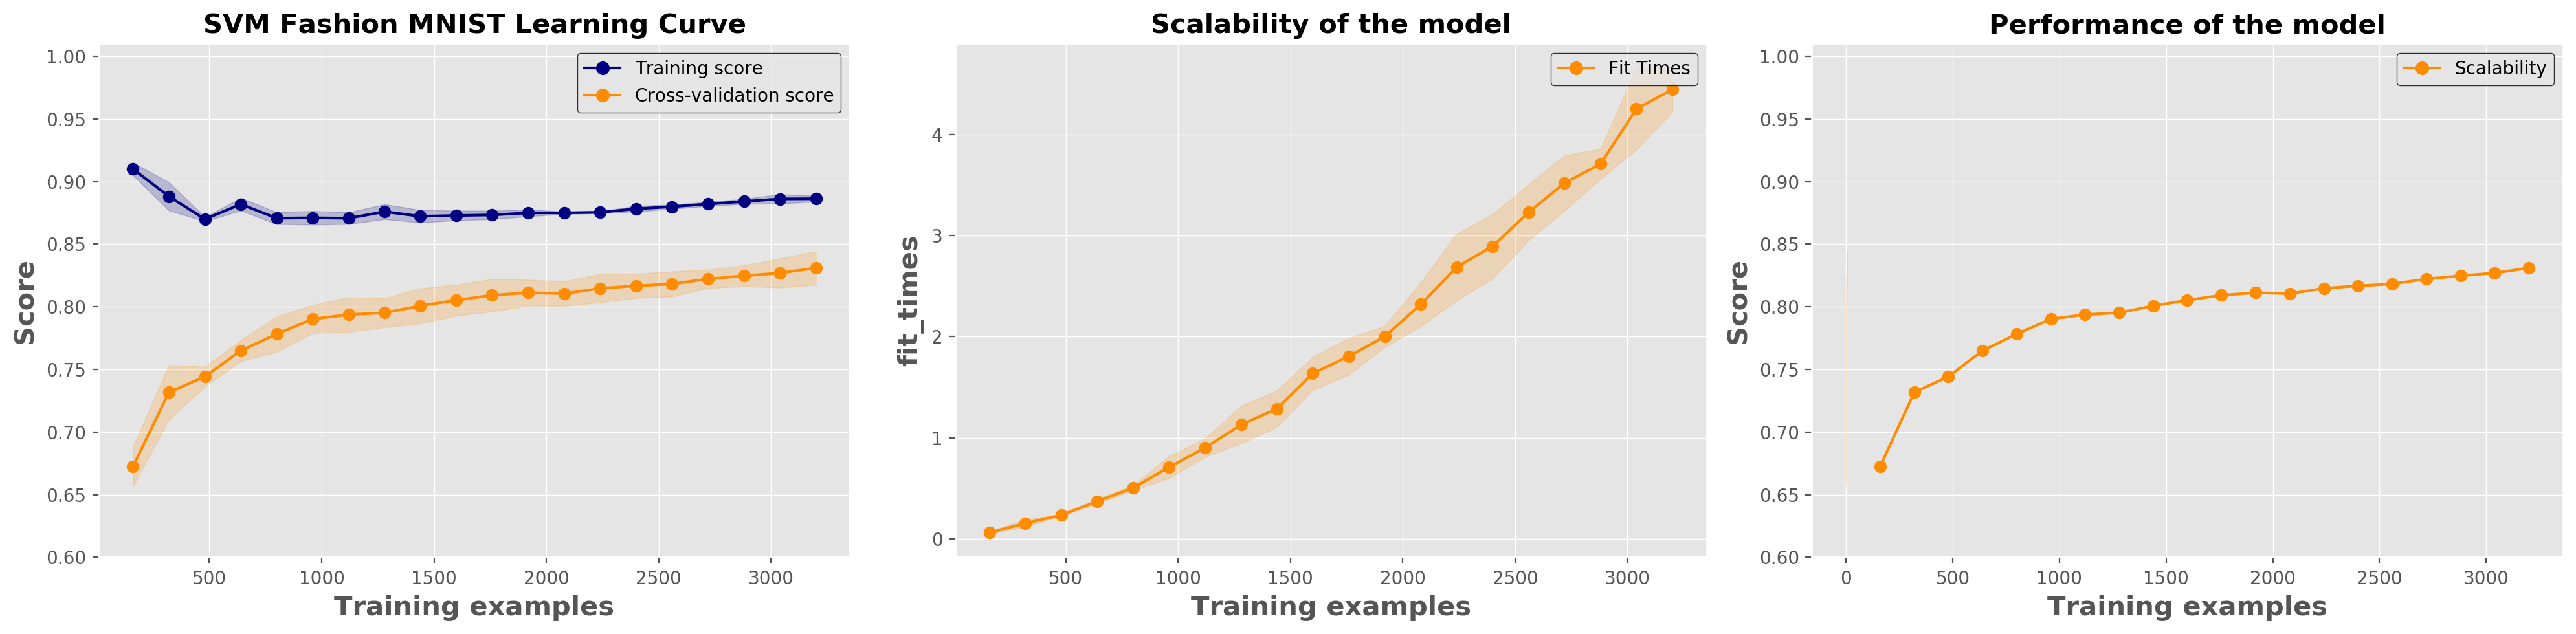

In [15]:
start_time = time.time()
results = []
for i in range(2):
    print(f"Working on learning curve: {i}")
    res = {"plt": None,
           "svm_results": None,
           "cv_results": None}
    if i == 0:
        temp_train_X = train_X.iloc[:val, :]
        temp_train_y = train_y.iloc[:val]
        title = f"{model_name} MNIST Learning Curve"
        f_name = f"{model_name}_MNIST"
        clf = rbf_mnist
        ex = "MNIST_RBF_"
    else:
        temp_train_X = fashion_train_X.iloc[:val, :]
        temp_train_y = fashion_train_y.iloc[:val]
        title = f"{model_name} Fashion MNIST Learning Curve"
        f_name = f"{model_name}_Fashion_MNIST"
        clf = rbf_fashion
        ex = "Fashion_RBF_"
    
    res['svm_results'], res['cv_results'] = utl.plot_learning_curve(estimator=clf, title=title,
                                                                    train_X=temp_train_X, train_y=temp_train_y, cv=cv,
                                                                    f_name=f_name, train_sizes=train_sizes,
                                                                    n_jobs=n_jobs, folder="SVM",
                                                                    save_individual=True, TESTING=True, backend='loky',
                                                                    extra_name=f"{ex}_RBF_Final")
    results.append(res)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Run Time: {elapsed_time}s")

In [17]:
best_rbf_mnist_estimator = SVC(kernel="rbf", cache_size=400).fit(train_X.iloc[:val, :], train_y.iloc[:val])
best_rbf_fashion_estimator = SVC(kernel="rbf", cache_size=400).fit(fashion_train_X.iloc[:val, :], fashion_train_y.iloc[:val])

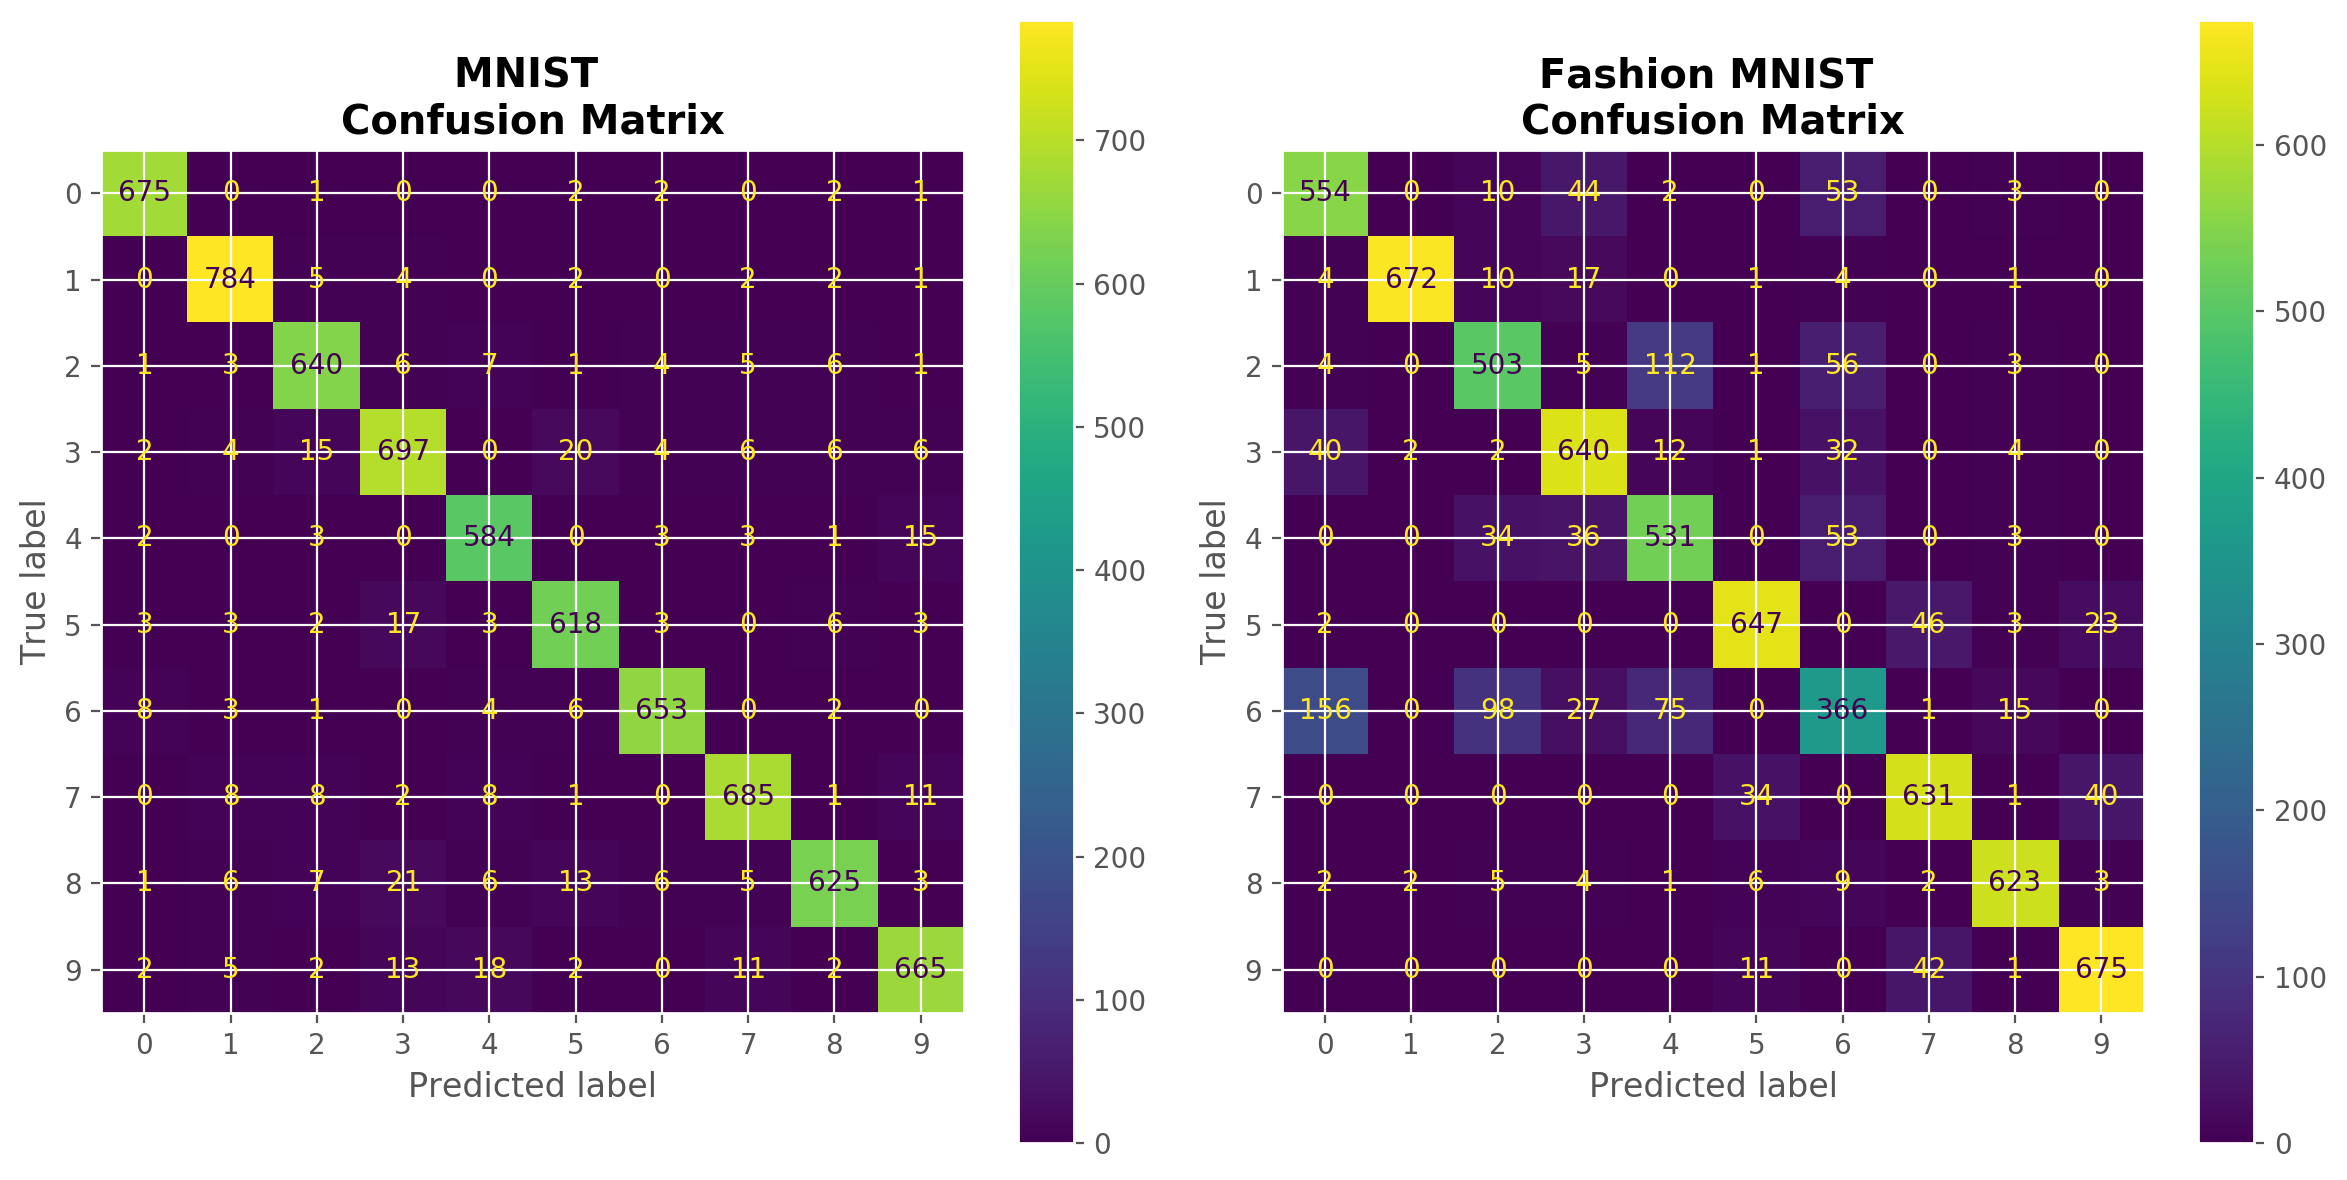

In [19]:
utl.plot_combined_confusion_matrix(best_rbf_mnist_estimator, test_X, test_y, best_rbf_fashion_estimator, fashion_test_X,
                                   fashion_test_y, directory=save_directory, fmt="d", plot_width=12, plot_height=6,
                                   extra_name="RBF_Final", folder="SVM")

# Final Learning Curve: Linear

Working on learning curve: 0
[learning_curve] Training set sizes: [ 160  320  480  640  800  960 1120 1280 1439 1599 1759 1920 2080 2240
 2400 2560 2720 2880 3040 3200]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of 100 | elapsed:    0.6s remaining:   27.4s
[Parallel(n_jobs=-1)]: Done  13 out of 100 | elapsed:    7.6s remaining:   51.2s
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:   13.2s remaining:   41.9s
[Parallel(n_jobs=-1)]: Done  35 out of 100 | elapsed:   20.0s remaining:   37.1s
[Parallel(n_jobs=-1)]: Done  46 out of 100 | elapsed:   26.6s remaining:   31.2s
[Parallel(n_jobs=-1)]: Done  57 out of 100 | elapsed:   32.9s remaining:   24.9s
[Parallel(n_jobs=-1)]: Done  68 out of 100 | elapsed:   39.5s remaining:   18.6s
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:   46.0s remaining:   12.2s
[Parallel(n_jobs=-1)]: Done  90 out of 100 | elapsed:   52.5s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished


Working on learning curve: 1
[learning_curve] Training set sizes: [ 160  320  480  640  800  960 1120 1280 1439 1599 1759 1920 2080 2240
 2400 2560 2720 2880 3040 3200]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of 100 | elapsed:    0.5s remaining:   25.9s
[Parallel(n_jobs=-1)]: Done  13 out of 100 | elapsed:    7.5s remaining:   49.9s
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:   12.5s remaining:   39.5s
[Parallel(n_jobs=-1)]: Done  35 out of 100 | elapsed:   19.2s remaining:   35.7s
[Parallel(n_jobs=-1)]: Done  46 out of 100 | elapsed:   25.6s remaining:   30.0s
[Parallel(n_jobs=-1)]: Done  57 out of 100 | elapsed:   32.2s remaining:   24.3s
[Parallel(n_jobs=-1)]: Done  68 out of 100 | elapsed:   38.6s remaining:   18.2s
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:   45.4s remaining:   12.1s
[Parallel(n_jobs=-1)]: Done  90 out of 100 | elapsed:   52.1s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished


Run Time: 153.92189240455627s


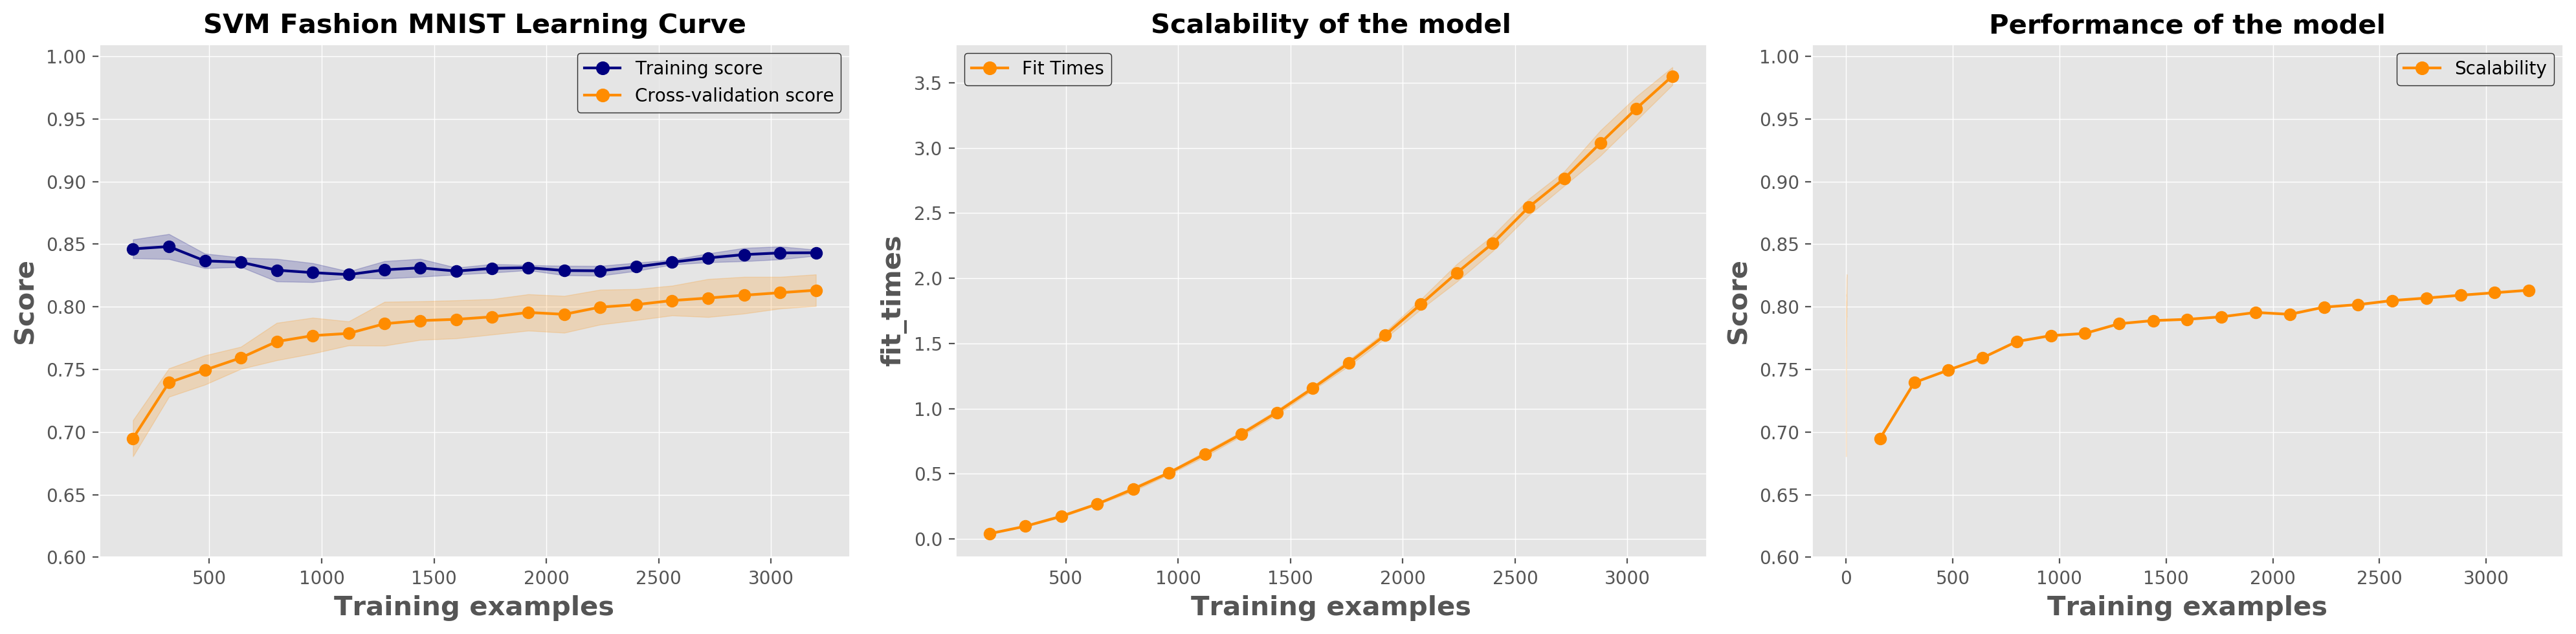

In [15]:
start_time = time.time()
results = []
for i in range(2):
    print(f"Working on learning curve: {i}")
    res = {"plt": None,
           "svm_results": None,
           "cv_results": None}
    if i == 0:
        temp_train_X = train_X.iloc[:val, :]
        temp_train_y = train_y.iloc[:val]
        title=f"{model_name} MNIST Learning Curve"
        f_name= f"{model_name}_MNIST"
        optimized_svm_linear = linear_mnist
        ex = "MNIST_Linear_"
    else:
        temp_train_X = fashion_train_X.iloc[:val, :]
        temp_train_y = fashion_train_y.iloc[:val]
        title=f"{model_name} Fashion MNIST Learning Curve"
        f_name= f"{model_name}_Fashion_MNIST"
        optimized_svm_linear = linear_fashion
        ex = "Fashion_Linear_"
    
    res['svm_results'], res['cv_results'] = utl.plot_learning_curve(estimator=optimized_svm_linear, title=title, 
                                                       train_X=temp_train_X, train_y=temp_train_y, cv=cv, 
                                                       f_name=f_name, train_sizes=train_sizes, folder="SVM",
                                                       save_individual=True, TESTING=True, backend='loky', 
                                                                                n_jobs=n_jobs, extra_name=f"{ex}_Linear_Final")
    results.append(res)
    
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Run Time: {elapsed_time}s")